# Multi-Armed Bandit

In [60]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [86]:
restaurants = []

restaurants.append(np.random.normal(loc=3, scale=0.5, size=100))
restaurants.append(np.random.normal(loc=7, scale=0.5, size=100))
restaurants.append(np.random.normal(loc=5, scale=0.5, size=100))

print('Mean', 'Min', 'Max')
print(restaurants[0].mean(), restaurants[0].min(), restaurants[0].max())
print(restaurants[1].mean(), restaurants[1].min(), restaurants[1].max())
print(restaurants[2].mean(), restaurants[2].min(), restaurants[2].max())

Mean Min Max
3.048819302535679 1.8800042595073212 4.521132702125085
7.037845332980023 5.956991246754585 8.211537544594938
5.068523431326154 4.039423671629713 6.244350788951896


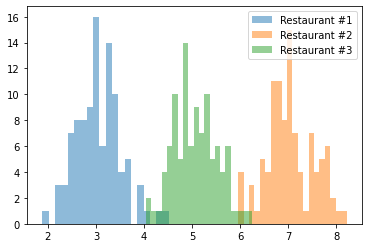

In [87]:
plt.hist(restaurants[0], bins=20, alpha=0.5, label="Restaurant #1")
plt.hist(restaurants[1], bins=20, alpha=0.5, label="Restaurant #2")
plt.hist(restaurants[2], bins=20, alpha=0.5, label="Restaurant #3")
plt.legend()
plt.show()

In [88]:
# randomly selecting an element from the population

np.random.choice(restaurants[0], 1)[0]

3.335973395467412

## Exploration

In [89]:
total_rewards = 0
selected_restaurants = [0, 0, 0]
for i in range(300):
    random_restaurant = np.random.choice(3, 1)[0]
    selected_restaurants[random_restaurant] += 1
    reward = np.random.choice(restaurants[random_restaurant], 1)[0]
    total_rewards += reward
    
print(f"Total Reward: {total_rewards:.2f}")
print(f"Selected Restaurants: {selected_restaurants}")

Total Reward: 1508.67
Selected Restaurants: [108, 109, 83]


## Exploitation

In [90]:
total_rewards = 0
initial_rewards = []
selected_restaurants = [0, 0, 0]

for i in range(3):
    selected_restaurants[i] += 1
    reward = np.random.choice(restaurants[i], 1)[0]
    initial_rewards.append(reward)
    total_rewards = reward

initial_rewards

[2.979200904013795, 7.476385724087899, 4.946076421218434]

In [91]:
restaurant_max_reward = np.argmax(initial_rewards)
restaurant_max_reward

1

In [92]:
for i in range(297):
    selected_restaurants[restaurant_max_reward] += 1
    reward = np.random.choice(restaurants[restaurant_max_reward], 1)[0]
    total_rewards += reward

print(f"Total Reward: {total_rewards:.2f}")


Total Reward: 2102.89


## Epsilon-Greedy

In [93]:
epsilon = 0.2 # 20%
total_rewards = 0
visits_restaurants = [0, 0, 0]
mean_restaurants = [0, 0, 0]

explore_count = 0
exploite_count = 0

for i in range(300):
    
    steps = int(300 / (300 * epsilon))
    if (i + 1) % steps == 0:
        # explore
        restaurant = np.random.choice(3, 1)[0]
        explore_count += 1
    else:
        # exploite
        restaurant = np.argmax(mean_restaurants)
        exploite_count += 1
        
    reward = np.random.choice(restaurants[restaurant], 1)[0]
    total_rewards += reward
    
    # updating mean reward for the restaurant
    updated_mean = ((mean_restaurants[restaurant] * visits_restaurants[restaurant]) + reward) / (visits_restaurants[restaurant] + 1)
    mean_restaurants[restaurant] = updated_mean
    
    visits_restaurants[restaurant] += 1


print(explore_count, exploite_count)
print(f"Total Reward: {total_rewards:.2f}")
print(f"Visited Restaurants: {visits_restaurants}")

60 240
Total Reward: 1965.55
Visited Restaurants: [24, 246, 30]


## UCB-1

In [98]:
total_rewards = 0
visits_restaurants = [0, 0, 0]
mean_restaurants = [0, 0, 0]
ubc_restaurants = [0, 0, 0]

for i in range(300):
    for j in range(3):
        ubc_restaurants[j] = mean_restaurants[j] + math.sqrt((20 * math.log(i + 1))/(visits_restaurants[j] + 1))
    
    print(f"UBC #{i}: {ubc_restaurants}")
    restaurant = np.argmax(ubc_restaurants)
            
    reward = np.random.choice(restaurants[restaurant], 1)[0]
    total_rewards += reward
    
    # updating mean reward for the restaurant
    updated_mean = ((mean_restaurants[restaurant] * visits_restaurants[restaurant]) + reward) / (visits_restaurants[restaurant] + 1)
    mean_restaurants[restaurant] = updated_mean
    
    visits_restaurants[restaurant] += 1

print(f"Total Reward: {total_rewards:.2f}")
print(f"UBC: {ubc_restaurants}")
print(f"Visited Restaurants: {visits_restaurants}")

UBC #0: [0.0, 0.0, 0.0]
UBC #1: [5.069778074840188, 3.723297411059034, 3.723297411059034]
UBC #2: [5.08929849386921, 4.687456215620814, 4.687456215620814]
UBC #3: [5.199181273763659, 5.265537695468319, 5.265537695468319]
UBC #4: [5.403169300026724, 10.743071275607633, 5.6735137479944475]
UBC #5: [5.559537439479535, 10.535650638913896, 5.986250026900071]
UBC #6: [5.685635205068625, 10.205991809727482, 6.238445558078251]
UBC #7: [5.790882569851455, 9.957960218090419, 6.44894028764391]
UBC #8: [5.880944502610008, 9.757930767426837, 6.629064153161017]
UBC #9: [5.959482638237056, 9.593722227379669, 6.7861404244151124]
UBC #10: [6.028994751981022, 9.485003772793428, 6.925164651903044]
UBC #11: [6.091257564321394, 9.404819453960542, 7.049690276583788]
UBC #12: [6.147577988707059, 9.313873684658095, 7.162331125355119]
UBC #13: [6.198944139322075, 9.134103317815917, 7.265063426585151]
UBC #14: [6.246120431498284, 9.080390885644103, 7.359416010937567]
UBC #15: [6.289709837088534, 9.0262667632947